# Q1 A. Classification of Fruits


You are provided with a dataset of fruits. Each fruit is characterized by two features: weight (in grams) and sweetness level (on a scale of 1 to 10). You want to classify a new fruit as either an "Apple" or an "Orange" based on these features using the KNN algorithm.

In [4]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt


In [5]:
df=pd.read_csv('Book1.csv')
df.head()

,FRUIT ID,Weight (grams),Sweetness Level,Label (Fruit Type)
0,1,180,7,Apple
1,2,200,6,Apple
2,3,150,4,Orange
3,4,170,5,Orange
4,5,160,6,Apple


### another way

data = {
    'weight': [180, 200, 150, 170, 160, 140],
    'sweetness': [7, 6, 4, 5, 6, 3],
    'label': ['apple', 'apple','orange', 'orange', 'apple', 'orange']
}

df=pd.DataFrame(data)
df.head()

In [8]:
#np.sum because we are doing this for each feature in x1 and x2
def euclidean_dis(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

def manhattan_dis(x1,x2):
    return np.sum(np.abs(x1-x2))

def minkowski_dis(x1,x2,p):
    return np.power(np.sum((x1-x2)**p),1/p)

### Plotting the Data

0
Apple
   FRUIT ID  Weight (grams)  Sweetness Level Label (Fruit Type)
0         1             180                7              Apple
1         2             200                6              Apple
4         5             160                6              Apple
1
Orange
   FRUIT ID  Weight (grams)  Sweetness Level Label (Fruit Type)
2         3             150                4             Orange
3         4             170                5             Orange
5         6             140                3             Orange


<Figure size 1000x600 with 0 Axes>

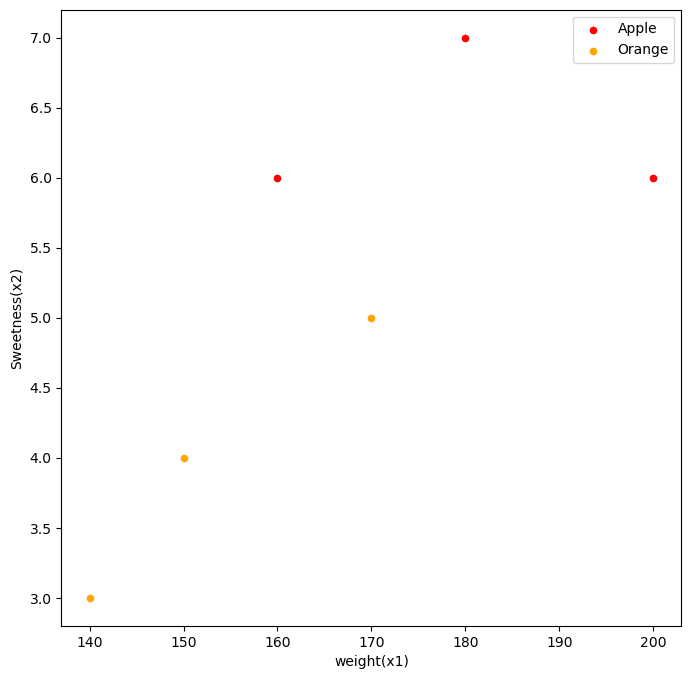

In [10]:
plt.figure(figsize=(10,6))
fig,ax=plt.subplots(figsize=(8,8))

grouped=df.groupby('Label (Fruit Type)')

colors={'Apple':'red', 'Orange':'orange'}

i=0
for key, group in grouped:
    print(i)
    print(key)
    print(group)
    group.plot(ax=ax, kind='scatter',x='Weight (grams)' ,y='Sweetness Level', label=key, color=colors[key])
    i+=1

plt.xlabel('weight(x1)')
plt.ylabel('Sweetness(x2)')
plt.show()

In [11]:
label_map = {'Apple': 0, 'Orange': 1}
df['label_num'] = df['Label (Fruit Type)'].map(label_map)

df

,FRUIT ID,Weight (grams),Sweetness Level,Label (Fruit Type),label_num
0,1,180,7,Apple,0
1,2,200,6,Apple,0
2,3,150,4,Orange,1
3,4,170,5,Orange,1
4,5,160,6,Apple,0
5,6,140,3,Orange,1


In [12]:
x_train=df.iloc[:, 1:-2].to_numpy()
y_train=df.iloc[:,-2].to_numpy()
print(y_train)
print(x_train)

['Apple' 'Apple' 'Orange' 'Orange' 'Apple' 'Orange']
[[180   7]
 [200   6]
 [150   4]
 [170   5]
 [160   6]
 [140   3]]


### Finding Neigbours

In [14]:
def find_neighbours(k, method,x_train,new_point):
    neighbour_array=[]
    for i in range(len(x_train)):
        if method =='euclidean':
            dist=euclidean_dis(x_train[i],new_point)
        if method =='manhattan':
            dist=manhattan_dis(x_train[i],new_point)
        if method =='minkowski':
            dist=minkowski_dis(x_train[i],new_point,2)
        neighbour_array.append([i,dist])
    neighbour_array.sort(key=lambda x: x[1])

    return neighbour_array[0:k]
    

### Classification

In [16]:
from collections import Counter
def classify(neighbour_arr):
    class_arr=[y_train[i[0]] for i in neighbour_arr ]
    return Counter(class_arr).most_common(1)[0][0]

# def _predict(self, x):
#         # compute the distance
#         distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
#         # get the closest k
#         k_indices = np.argsort(distances)[:self.k]
#         k_nearest_labels = [self.y_train[i] for i in k_indices]

#         # majority voye
#         most_common = Counter(k_nearest_labels).most_common()
#         return most_common[0][0]

In [17]:
new_fruit=np.array([[165,5.5]])

dist_metrics=['euclidean','manhattan','minkowski']

for dist_metric in dist_metrics:
    print(f"using Distance metric of {dist_metric}")
    for k in [1,3,5]:
        knn=find_neighbours(k,dist_metric,x_train,new_fruit)
        prediction=classify(knn)
        print(f"prediction with k={k} is : {prediction}")


using Distance metric of euclidean
prediction with k=1 is : Orange
prediction with k=3 is : Apple
prediction with k=5 is : Orange
using Distance metric of manhattan
prediction with k=1 is : Orange
prediction with k=3 is : Apple
prediction with k=5 is : Orange
using Distance metric of minkowski
prediction with k=1 is : Orange
prediction with k=3 is : Apple
prediction with k=5 is : Orange


# Q2 B. Classification of Fruits using Scikit

Implement the Python code for Q-1. A using the scikit-learn library. Plot the given samples, using red for "Apple" and orange for "Orange." Also, plot the decision boundary. Calculate the distances using Euclidean, Manhattan, and Minkowski metrics, and compare the results.

In [20]:
from sklearn.neighbors import KNeighborsClassifier

for k in [1,3,5]:
    knn=KNeighborsClassifier(n_neighbors=k,metric='euclidean',algorithm='brute')
    knn.fit(x_train,y_train)
    prediction = knn.predict(new_fruit)
    print(f"prediction with k={k} is : {prediction}")

prediction with k=1 is : ['Orange']
prediction with k=3 is : ['Orange']
prediction with k=5 is : ['Orange']


In [21]:
grouped.head()

,FRUIT ID,Weight (grams),Sweetness Level,Label (Fruit Type),label_num
0,1,180,7,Apple,0
1,2,200,6,Apple,0
2,3,150,4,Orange,1
3,4,170,5,Orange,1
4,5,160,6,Apple,0
5,6,140,3,Orange,1
